In [5]:
# %pip install pandas pyarrow

In [6]:
# %pip install tqdm


In [7]:
# import pandas as pd
# from tqdm import tqdm

# parquet_file = 'train_data.parquet'
# csv_file = 'train_data.csv'
# chunk_size = 100000  # Adjust chunk size based on your memory

# # Read total rows to set progress bar
# total_rows = pd.read_parquet(parquet_file).shape[0]
# reader = pd.read_parquet(parquet_file, engine='pyarrow', columns=None)

# # Write CSV in chunks with progress bar
# with open(csv_file, 'w', encoding='utf-8', newline='') as f:
#     header_written = False
#     for start in tqdm(range(0, total_rows, chunk_size), total=(total_rows // chunk_size) + 1):
#         chunk = reader.iloc[start:start+chunk_size]
#         chunk.to_csv(f, header=not header_written, index=False)
#         header_written = True


In [8]:
# %pip install matplotlib seaborn pandas numpy scikit-learn scipy statsmodels

In [3]:
import pandas as pd

train = pd.read_csv("test_data.csv", parse_dates=['timestamp'])
print(train.info())
print(train.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12065 entries, 0 to 12064
Data columns (total 96 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      12065 non-null  object 
 1   underlying     12065 non-null  float64
 2   call_iv_24000  4762 non-null   float64
 3   call_iv_24100  4786 non-null   float64
 4   call_iv_24200  4838 non-null   float64
 5   call_iv_24300  4882 non-null   float64
 6   call_iv_24400  4855 non-null   float64
 7   call_iv_24500  4852 non-null   float64
 8   call_iv_24600  4787 non-null   float64
 9   call_iv_24700  4850 non-null   float64
 10  call_iv_24800  4819 non-null   float64
 11  call_iv_24900  4900 non-null   float64
 12  call_iv_25000  4818 non-null   float64
 13  call_iv_25100  4826 non-null   float64
 14  call_iv_25200  4763 non-null   float64
 15  call_iv_25300  4801 non-null   float64
 16  call_iv_25400  4876 non-null   float64
 17  call_iv_25500  4853 non-null   float64
 18  call_i

/tmp/ipykernel_6009/3349883110.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train = pd.read_csv("test_data.csv", parse_dates=['timestamp'])


In [4]:
iv_cols = [col for col in train.columns if 'iv_' in col]
call_iv_cols = [col for col in iv_cols if col.startswith('call_iv_')]
put_iv_cols = [col for col in iv_cols if col.startswith('put_iv_')]

print("Call IV strikes:", [col.split('_')[-1] for col in call_iv_cols])
print("Put IV strikes:", [col.split('_')[-1] for col in put_iv_cols])


Call IV strikes: ['24000', '24100', '24200', '24300', '24400', '24500', '24600', '24700', '24800', '24900', '25000', '25100', '25200', '25300', '25400', '25500', '25600', '25700', '25800', '25900', '26000', '26100', '26200', '26300', '26400', '26500']
Put IV strikes: ['23000', '23100', '23200', '23300', '23400', '23500', '23600', '23700', '23800', '23900', '24000', '24100', '24200', '24300', '24400', '24500', '24600', '24700', '24800', '24900', '25000', '25100', '25200', '25300', '25400', '25500']


In [5]:
train[call_iv_cols + put_iv_cols].describe().T[['mean', 'std', 'min', 'max']]


,mean,std,min,max
call_iv_24000,0.256363,0.023853,0.211965,0.329322
call_iv_24100,0.246952,0.021822,0.202257,0.325091
call_iv_24200,0.236247,0.021306,0.192681,0.294849
call_iv_24300,0.226294,0.021189,0.184373,0.280493
call_iv_24400,0.216683,0.021575,0.174893,0.267558
call_iv_24500,0.208504,0.022383,0.167585,0.257639
call_iv_24600,0.201364,0.022996,0.159284,0.250346
call_iv_24700,0.194952,0.023187,0.154661,0.245681
call_iv_24800,0.191766,0.023228,0.154145,0.241232
call_iv_24900,0.190807,0.024128,0.156998,0.244315


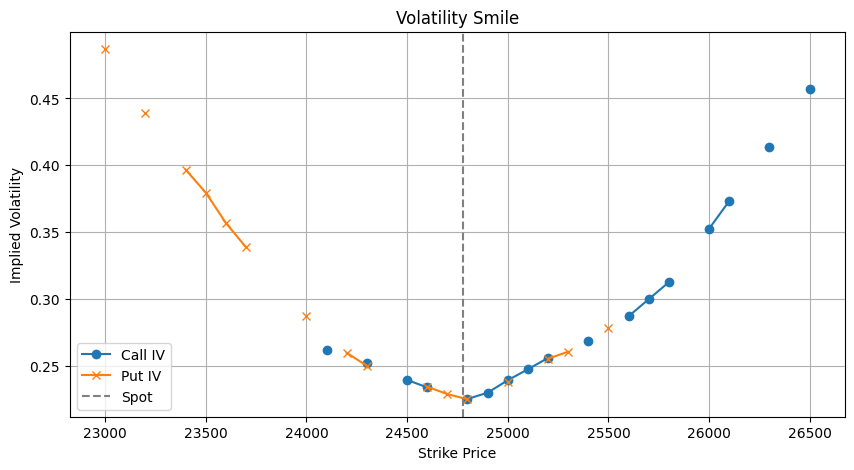

In [9]:
import matplotlib.pyplot as plt

sample_row = train.iloc[1121] # choose any row with good coverage

call_strikes = [int(c.split('_')[-1]) for c in call_iv_cols]
call_ivs = sample_row[call_iv_cols].values

put_strikes = [int(c.split('_')[-1]) for c in put_iv_cols]
put_ivs = sample_row[put_iv_cols].values

plt.figure(figsize=(10, 5))
plt.plot(call_strikes, call_ivs, label='Call IV', marker='o')
plt.plot(put_strikes, put_ivs, label='Put IV', marker='x')
plt.axvline(sample_row['underlying'], color='grey', linestyle='--', label='Spot')
plt.title('Volatility Smile')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True)
plt.show()


<Axes: title={'center': 'Call IV (25000 Strike) Over Time'}, xlabel='timestamp'>

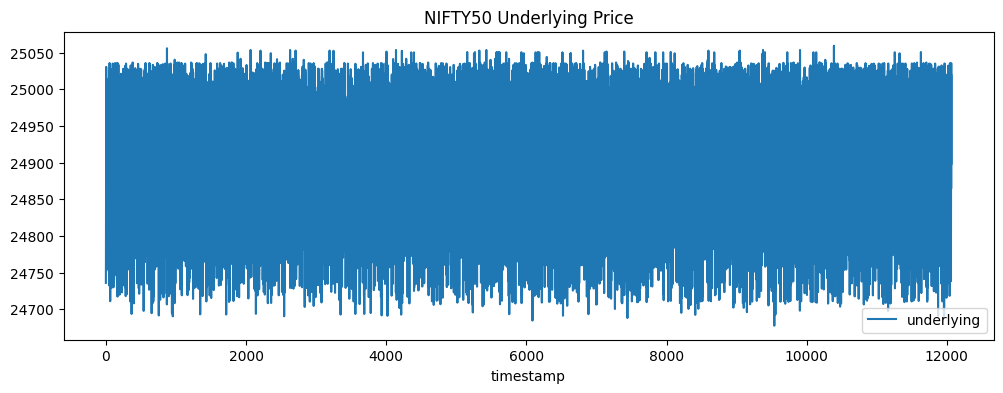

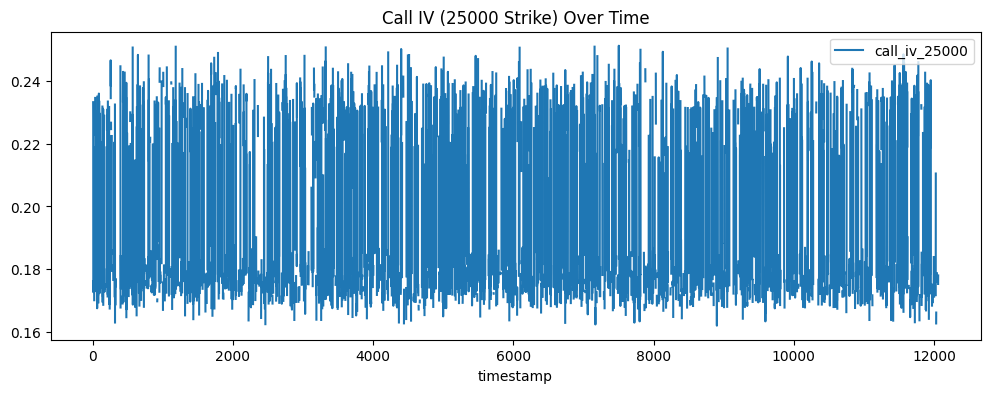

In [12]:
import seaborn as sns

# Plot underlying index over time
train[['timestamp', 'underlying']].set_index('timestamp').plot(figsize=(12, 4), title="NIFTY50 Underlying Price")

# Example: Plot single IV strike over time
train[['timestamp', 'call_iv_25000']].set_index('timestamp').plot(figsize=(12, 4), title="Call IV (25000 Strike) Over Time")

In [ ]:
def extract_strike(col): return int(col.split('_')[-1])

for col in call_iv_cols + put_iv_cols:
    strike = extract_strike(col)
    train[f'moneyness_{col}'] = (strike - train['underlying']) / train['underlying']

In [15]:
from numpy.polynomial.polynomial import Polynomial
import numpy as np
import pandas as pd

def get_smile_coeffs(row, strike_cols):
    strikes = [int(c.split('_')[-1]) for c in strike_cols]
    ivs = row[strike_cols].values.astype(np.float64)  # Ensure float
    mask = ~np.isnan(ivs)  # Filter out NaNs
    if mask.sum() < 3:
        return pd.Series([np.nan, np.nan, np.nan], index=[f'{strike_cols[0][:4]}_smile_a', f'{strike_cols[0][:4]}_smile_b', f'{strike_cols[0][:4]}_smile_c'])
    try:
        coefs = Polynomial.fit(np.array(strikes)[mask], ivs[mask], deg=2).convert().coef
        return pd.Series(coefs, index=[f'{strike_cols[0][:4]}_smile_a', f'{strike_cols[0][:4]}_smile_b', f'{strike_cols[0][:4]}_smile_c'])
    except Exception as e:
        return pd.Series([np.nan, np.nan, np.nan], index=[f'{strike_cols[0][:4]}_smile_a', f'{strike_cols[0][:4]}_smile_b', f'{strike_cols[0][:4]}_smile_c'])


In [16]:
train[["call_smile_a", "call_smile_b", "call_smile_c"]] = train.apply(lambda row: get_smile_coeffs(row, call_iv_cols), axis=1)
train[["put_smile_a", "put_smile_b", "put_smile_c"]] = train.apply(lambda row: get_smile_coeffs(row, put_iv_cols), axis=1)


KeyboardInterrupt: 

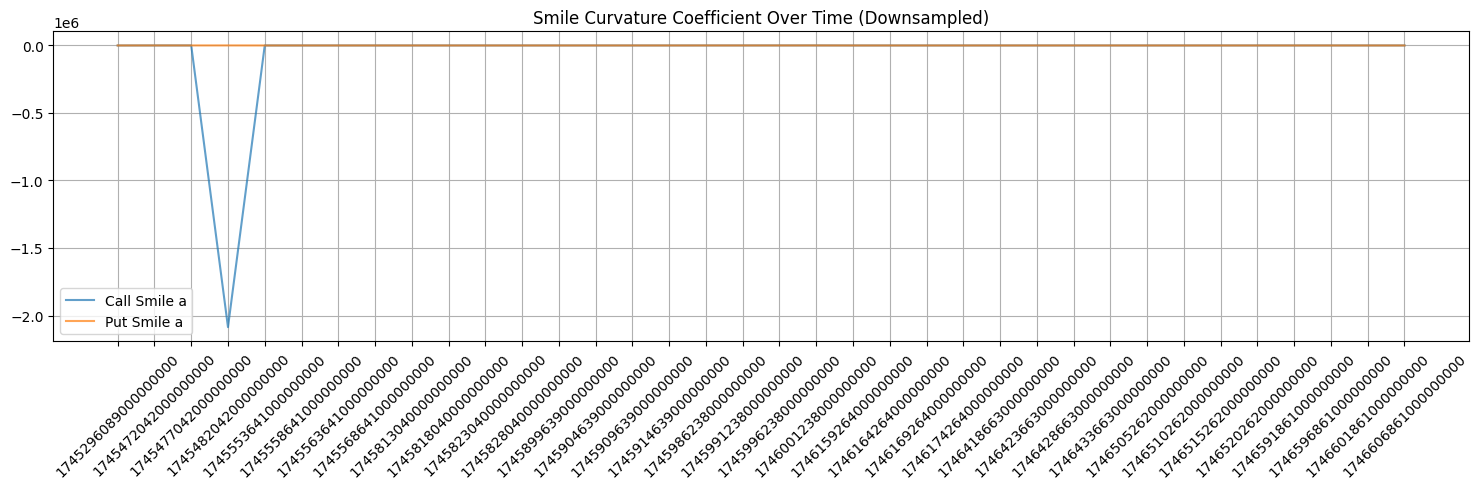

In [ ]:
import matplotlib.pyplot as plt

# Downsample for faster plotting
step = 5000  # plot every 10th row
subset = train.iloc[::step]

plt.figure(figsize=(15, 5))
plt.plot(subset["timestamp"], subset["call_smile_a"], label='Call Smile a', alpha=0.7)
plt.plot(subset["timestamp"], subset["put_smile_a"], label='Put Smile a', alpha=0.7)
plt.legend()
plt.title("Smile Curvature Coefficient Over Time (Downsampled)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
